In [235]:
library(tibble)

Warning message:
“package ‘tibble’ was built under R version 4.2.3”


In [1]:
system("awk '{print $1,$2}' dbCAN2out/all.dbcan2.txt | uniq | awk '{print $2}' | sed 's/|/ /g' | awk '{print $2}' | sed 's/[|_]/ /g' | awk '{print $1}' | sed 's/[0123456789]//g' > dbCAN2out/tmp")

In [6]:
system("awk '{print $1}' dbCAN2out/all.dbcan2.txt > dbCAN2out/tmp2")

In [7]:
system("paste dbCAN2out/tmp2 dbCAN2out/tmp > dbCAN2out/outfile")

In [203]:
dbres = read.table('./dbCAN2out/outfile',sep = '\t')

In [204]:
head(dbres)

,V1,V2
,<chr>,<chr>
1,KO-CLP1.dna_NODE_1_length_917063_cov_17.085608_14,CE
2,KO-CLP1.dna_NODE_1_length_917063_cov_17.085608_28,GT
3,KO-CLP1.dna_NODE_1_length_917063_cov_17.085608_51,GT
4,KO-CLP1.dna_NODE_1_length_917063_cov_17.085608_58,CE
5,KO-CLP1.dna_NODE_1_length_917063_cov_17.085608_64,CBM
6,KO-CLP1.dna_NODE_1_length_917063_cov_17.085608_70,GH


In [216]:
gene.TPM = read.table('./Salmon_merge/gene.TPM',header =T)
colnames(gene.TPM)[1] = 'V1'

In [206]:
library(dplyr)
egg_merge  = left_join(dbres,gene.TPM ,by='V1')

In [207]:
egg_merge = egg_merge[,-1]

In [208]:
head(egg_merge,8)

,V2,KO.CLP1,KO.CLP2,KO.CLP3,KO.CLP4,KO.CLP5,KO.CLP6,KO.CLP7,KO.CLP8,KO.NC1,⋯,WT.CLP7,WT.CLP8,WT.NC1,WT.NC2,WT.NC3,WT.NC4,WT.NC5,WT.NC6,WT.NC7,WT.NC8
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CE,4.67927,1.56157,2.80254,2.02181,1.24842,1.62049,0.725377,1.557960,0.810301,⋯,0,0,0,0,0.367747,0.151016,0.656516,0.322736,0.279999,0.000000
2,GT,4.94674,1.92314,3.56626,1.87534,1.47629,1.70374,0.687599,1.544420,0.783478,⋯,0,0,0,0,0.580271,0.255418,0.697758,0.232233,0.118863,0.061572
3,GT,3.90945,1.70698,3.14199,1.63444,1.65322,1.17043,0.625131,1.233350,0.552231,⋯,0,0,0,0,0.000000,0.000000,0.000000,0.040452,0.000000,0.000000
4,CE,5.81553,2.05509,3.61247,2.00418,1.10901,1.84421,0.761303,1.956880,0.829912,⋯,0,0,0,0,0.362242,0.345529,0.950963,0.254725,0.000000,0.040436
5,CBM,2.81398,1.96327,3.23813,1.36598,1.48854,1.65679,0.588021,1.427240,0.592467,⋯,0,0,0,0,0.647849,0.293615,0.936753,0.200898,0.112171,0.065679
6,GH,4.87388,1.52355,3.17419,1.72700,1.54548,1.24355,0.630556,0.981898,0.539619,⋯,0,0,0,0,0.476615,0.212422,0.632197,0.092803,0.350352,0.000000
7,GH,5.30117,1.30073,3.82423,1.35647,1.30549,1.87061,0.428995,1.597400,0.869251,⋯,0,0,0,0,0.047539,0.401542,1.067620,0.213037,0.459337,0.093124
8,CBM,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,⋯,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
library(collapse)
f1 <- function(x) sum(x, na.rm = TRUE)
data = collap(egg_merge, ~ V2, FUN = f1)

In [212]:
sample_info = read.table('./design.txt',header =  T)

In [213]:
sample_calss = gsub('-','.',sample_info$Group)

In [214]:
library(magrittr)
library(tidyr)
data %<>% tibble::column_to_rownames(var="V2")
annotation_c <- data.frame(sample_calss)
rownames(annotation_c) <- colnames(data)
data = log2(data+1)
library(pheatmap)
data = data[-1,]

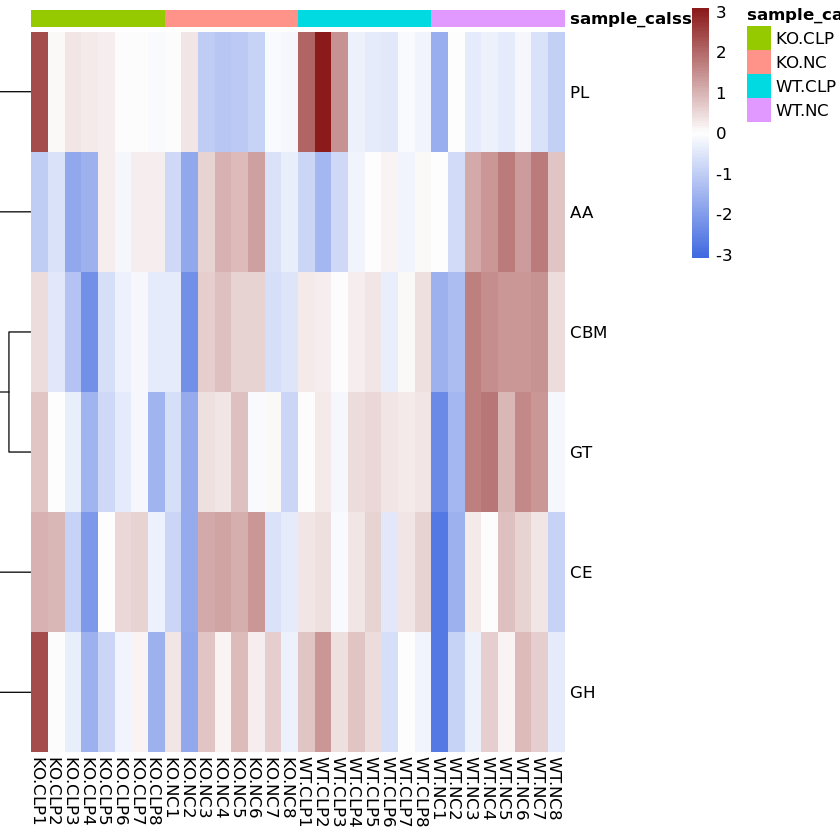

In [215]:
p = pheatmap(data,
         cluster_rows = T, #行聚类
         cluster_cols = F, #列聚类
         show_rownames = T,
         show_colnames = T,
         annotation_col = annotation_c, #添加分类图例
         scale = "row", #对行标准化,这一步很重要
         cellwidth = 10, #设置小格子的宽
         #cellheight = 1, #设置小格子的高
         border= F, #不显示小格子的边框
         #angle_col = "45",#列名称旋转45°
         color = colorRampPalette(c("#4169E1","#FFFFFF","#8B1A1A"))(100) # 热图基准颜色
         #main = "碳水化合物活性"
)

In [113]:
pdf('./2.gene_annotation/dbcan2.pdf',height = 5,width = 9)
p
dev.off()
png('./2.gene_annotation/dbcan2.png',height = 500,width = 900)
p
dev.off()

png 
  2

png 
  2

### 玹图

In [219]:
data_t = t(data)

In [231]:
dd = cbind(sample_info$Group,as.data.frame(data_t))

In [232]:
colnames(dd)[1] = 'group'

In [233]:
data1 = collap(dd, ~ group, FUN = f1)

In [237]:
data1

group,AA,CBM,CE,GH,GT,PL
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KO-CLP,65.87431,104.1994,91.85633,117.8328,116.3622,73.11778
KO-NC,66.90624,104.5762,92.01485,118.0623,116.6011,70.97498
WT-CLP,66.12219,104.8358,92.08794,118.2036,116.9531,73.67560
WT-NC,68.46086,105.2196,91.56665,117.8310,117.1035,70.83688


In [239]:
data2 = tibble::column_to_rownames(data1,var = 'group')

In [249]:
library(circlize)#需先安装
pdf('./2.gene_annotation/xuanplot.pdf')
chordDiagram(data2)
dev.off()
png('./2.gene_annotation/xuanplot.png')
chordDiagram(data2)
dev.off()

Warning message in chordDiagram(data2):
“It seems your input data is an adjacency matrix, maybe you need to convert it to 'matrix' explicitely.”


png 
  2

Warning message in chordDiagram(data2):
“It seems your input data is an adjacency matrix, maybe you need to convert it to 'matrix' explicitely.”


png 
  2

### CRAD

In [183]:
system("awk -F ' ' '{print $1,$9}' ./2.gene_annotation/CARD_merge.txt  > 2.gene_annotation/CARD.id.txt ")

In [131]:
colnames(gene.TPM)[1] = 'ORF_ID'

In [190]:
cardres = read.table('./2.gene_annotation/CARD.id.txt',header =T)

In [191]:
dim(cardres)

[1] 13843     2

In [194]:
library(dplyr)
egg_merge  = left_join(cardres,gene.TPM ,by='ORF_ID')

In [195]:
egg_merge = egg_merge[,-1]

In [196]:
head(egg_merge,8)

,Best_Hit_ARO,KO.CLP1,KO.CLP2,KO.CLP3,KO.CLP4,KO.CLP5,KO.CLP6,KO.CLP7,KO.CLP8,KO.NC1,⋯,WT.CLP7,WT.CLP8,WT.NC1,WT.NC2,WT.NC3,WT.NC4,WT.NC5,WT.NC6,WT.NC7,WT.NC8
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,vanT,4.093300,1.819180,2.085500,2.258780,1.219070,1.555300,0.675290,1.446980,0.788425,⋯,0.000000,0.000000,0.000000,0.000000,0.518512,0,0.727664,0.053505,0.147060,0.005921
2,adeF,1.110180,0.017645,0.111196,0.069570,0.244052,0.278737,0.199762,0.036210,0.000000,⋯,0.337066,0.176817,0.000000,0.006274,0.000000,0,0.000000,0.000000,0.000000,0.011964
3,vanY,0.625560,0.000000,0.000000,0.000000,0.000000,0.000000,0.083228,0.060461,0.000000,⋯,0.120639,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
4,adeF,1.166900,0.072736,0.310056,0.085062,0.312769,0.000000,0.230416,0.118410,0.025476,⋯,0.343836,0.000000,0.051033,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
5,vanT,3.213270,1.140450,2.960200,1.131680,0.851807,0.369933,0.510948,0.880787,0.073660,⋯,1.033170,1.004950,0.000000,0.000000,0.064206,0,0.052305,0.049551,0.049185,0.022979
6,vanY,1.115540,0.032348,0.037335,0.093949,0.017431,0.066685,0.057288,0.231147,0.000000,⋯,0.164725,0.125291,0.000000,0.015392,0.000000,0,0.031410,0.000000,0.000000,0.000000
7,vanG,0.679975,0.062030,0.000000,0.000000,0.062762,0.022896,0.061256,0.754330,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
8,vanT,1.638460,0.522258,0.065035,0.622862,2.295050,1.678360,2.746340,1.044510,0.000000,⋯,4.191650,3.530010,0.000000,0.546510,0.000000,0,0.000000,0.000000,0.000000,0.000000


In [197]:
data = collap(egg_merge, ~Best_Hit_ARO, FUN = f1)

In [198]:
library(magrittr)
library(tidyr)

data %<>% tibble::column_to_rownames(var="Best_Hit_ARO")

annotation_c <- data.frame(sample_calss)
rownames(annotation_c) <- colnames(data)

data = log2(data+1)

library(pheatmap)

data = data[-1,]

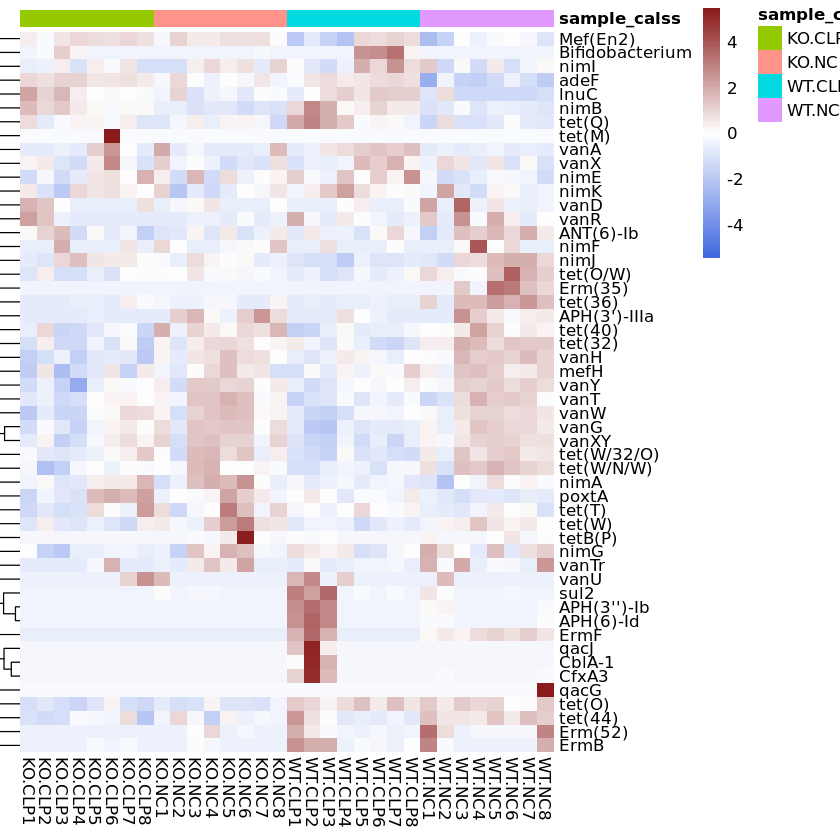

In [199]:
p = pheatmap(data,
         cluster_rows = T, #行聚类
         cluster_cols = F, #列聚类
         show_rownames = T,
         show_colnames = T,
         annotation_col = annotation_c, #添加分类图例
         scale = "row", #对行标准化,这一步很重要
         cellwidth = 10, #设置小格子的宽
         #cellheight = 1, #设置小格子的高
         border= F, #不显示小格子的边框
         #angle_col = "45",#列名称旋转45°
         color = colorRampPalette(c("#4169E1","#FFFFFF","#8B1A1A"))(100) # 热图基准颜色
         #main = "碳水化合物活性"
)

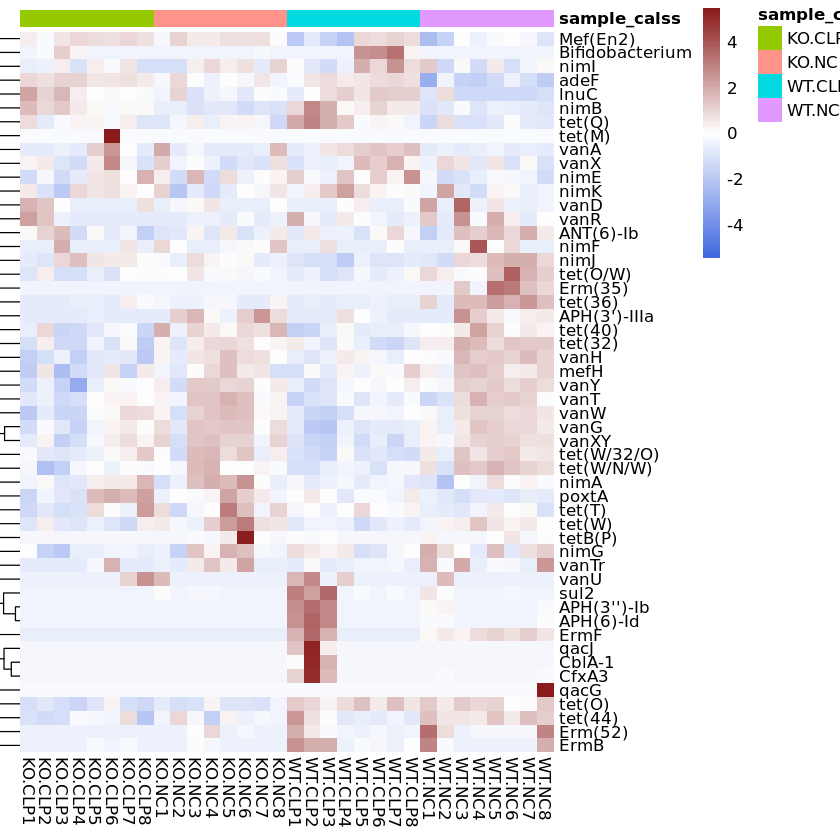

In [200]:
p

In [201]:
pdf('./2.gene_annotation/card.pdf',height = 8,width = 9)
p
dev.off()
png('./2.gene_annotation/card.png',height = 800,width = 900)
p
dev.off()

png 
  2

png 
  2